# PART ONE: NLTK

# 1. Importing the required libraries such as Pandas, NLTK, and Scikit-learn.


In [40]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from nltk.tag import pos_tag
from nltk.chunk import ne_chunk
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import networkx as nx
import matplotlib.pyplot as plt

In [41]:
#NLTK resources 
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/durgaprasadreddypralayakaveri/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/durgaprasadreddypralayakaveri/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/durgaprasadreddypralayakaveri/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /Users/durgaprasadreddypralayakaveri/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     /Users/durgaprasadreddypralayakaveri/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/durgaprasadreddypralayakaveri/nltk_data...
[nltk_da

True

# 2. Load the "headlines.csv"

In [84]:
df1 = pd.read_csv("headlines.csv")
input_headlines = df1['headline'].tolist()
df1

,id,headline
0,524288,"For Some, The Decision To Enlist Offers Direction"
1,524289,Whither The Astronauts Without A Shuttle?
2,524292,Tour Winner May Not Be First Over Finish Line
3,262153,California College Students Walk Out Of Class ...
4,524298,New Theory On 'Shaken Baby Syndrome'
...,...,...
9993,553757,"In Mammogram Debate, Differences Aren't So Big"
9994,29471,"Insys Files For Chapter 11, Days After Landmar..."
9995,291616,U.S. Threatened To Fine Yahoo $250K A Day If I...
9996,29472,"Opioid-Maker Insys Admits To Bribing Doctors, ..."


# 3. Perform text preprocessing on the headlines using NLTK functions


In [85]:
stop_words = set(stopwords.words('english'))
stmr = PorterStemmer()
lmtzr = WordNetLemmatizer()
def nltk_text(text):
    tokens = word_tokenize(text)
    filtered_tokens = [lmtzr.lemmatize(stmr.stem(w)) for w in tokens if w.lower() not in stop_words]
    return " ".join(filtered_tokens)

df1['cleantxt'] = df1['headline'].apply(nltk_text)


In [86]:
df1.head()

,id,headline,cleantxt
0,524288,"For Some, The Decision To Enlist Offers Direction",", decis enlist offer direct"
1,524289,Whither The Astronauts Without A Shuttle?,whither astronaut without shuttl ?
2,524292,Tour Winner May Not Be First Over Finish Line,tour winner may first finish line
3,262153,California College Students Walk Out Of Class ...,california colleg student walk class protest t...
4,524298,New Theory On 'Shaken Baby Syndrome',new theori 'shaken babi syndrom '


# 4. Perform Part-of-Speech (POS)

In [87]:
df1['custom_pos_tag'] = df1['cleantxt'].apply(lambda x: pos_tag(word_tokenize(x)))
df1

,id,headline,cleantxt,custom_pos_tag
0,524288,"For Some, The Decision To Enlist Offers Direction",", decis enlist offer direct","[(,, ,), (decis, JJ), (enlist, NN), (offer, NN..."
1,524289,Whither The Astronauts Without A Shuttle?,whither astronaut without shuttl ?,"[(whither, RB), (astronaut, NN), (without, IN)..."
2,524292,Tour Winner May Not Be First Over Finish Line,tour winner may first finish line,"[(tour, JJ), (winner, NN), (may, MD), (first, ..."
3,262153,California College Students Walk Out Of Class ...,california colleg student walk class protest t...,"[(california, NN), (colleg, NN), (student, NN)..."
4,524298,New Theory On 'Shaken Baby Syndrome',new theori 'shaken babi syndrom ',"[(new, JJ), (theori, NN), ('shaken, POS), (bab..."
...,...,...,...,...
9993,553757,"In Mammogram Debate, Differences Aren't So Big","mammogram debat , differ n't big","[(mammogram, NN), (debat, NN), (,, ,), (differ..."
9994,29471,"Insys Files For Chapter 11, Days After Landmar...","insi file chapter 11 , day landmark opioid set...","[(insi, NN), (file, NN), (chapter, NN), (11, C..."
9995,291616,U.S. Threatened To Fine Yahoo $250K A Day If I...,u. . threaten fine yahoo $ 250k day n't releas...,"[(u., NN), (., .), (threaten, VB), (fine, JJ),..."
9996,29472,"Opioid-Maker Insys Admits To Bribing Doctors, ...","opioid-mak insi admit bribe doctor , agre pay ...","[(opioid-mak, JJ), (insi, NN), (admit, NN), (b..."


# 5. Perform Named Entity Recognition (NER)

In [88]:
def custom_ner(text):
    words = word_tokenize(text)
    tags = pos_tag(words)
    tree = ne_chunk(tags)
    return tree
df1['custom_ner'] = df1['cleantxt'].apply(lambda x: custom_ner(x))
df1

,id,headline,cleantxt,custom_pos_tag,custom_ner
0,524288,"For Some, The Decision To Enlist Offers Direction",", decis enlist offer direct","[(,, ,), (decis, JJ), (enlist, NN), (offer, NN...","[(,, ,), (decis, JJ), (enlist, NN), (offer, NN..."
1,524289,Whither The Astronauts Without A Shuttle?,whither astronaut without shuttl ?,"[(whither, RB), (astronaut, NN), (without, IN)...","[(whither, RB), (astronaut, NN), (without, IN)..."
2,524292,Tour Winner May Not Be First Over Finish Line,tour winner may first finish line,"[(tour, JJ), (winner, NN), (may, MD), (first, ...","[(tour, JJ), (winner, NN), (may, MD), (first, ..."
3,262153,California College Students Walk Out Of Class ...,california colleg student walk class protest t...,"[(california, NN), (colleg, NN), (student, NN)...","[(california, NN), (colleg, NN), (student, NN)..."
4,524298,New Theory On 'Shaken Baby Syndrome',new theori 'shaken babi syndrom ',"[(new, JJ), (theori, NN), ('shaken, POS), (bab...","[(new, JJ), (theori, NN), ('shaken, POS), (bab..."
...,...,...,...,...,...
9993,553757,"In Mammogram Debate, Differences Aren't So Big","mammogram debat , differ n't big","[(mammogram, NN), (debat, NN), (,, ,), (differ...","[(mammogram, NN), (debat, NN), (,, ,), (differ..."
9994,29471,"Insys Files For Chapter 11, Days After Landmar...","insi file chapter 11 , day landmark opioid set...","[(insi, NN), (file, NN), (chapter, NN), (11, C...","[(insi, NN), (file, NN), (chapter, NN), (11, C..."
9995,291616,U.S. Threatened To Fine Yahoo $250K A Day If I...,u. . threaten fine yahoo $ 250k day n't releas...,"[(u., NN), (., .), (threaten, VB), (fine, JJ),...","[(u., NN), (., .), (threaten, VB), (fine, JJ),..."
9996,29472,"Opioid-Maker Insys Admits To Bribing Doctors, ...","opioid-mak insi admit bribe doctor , agre pay ...","[(opioid-mak, JJ), (insi, NN), (admit, NN), (b...","[(opioid-mak, JJ), (insi, NN), (admit, NN), (b..."


# 6. Using CountVectorizer and TF-IDF vectorizer

In [47]:
count_vectorizer = CountVectorizer()
X_count = count_vectorizer.fit_transform(df1['cleantxt'])
tfidf_ = TfidfTransformer()
Xtf= tfidf_.fit_transform(X_count)

# 7. Generate a summary of the news headlines using the TextRank algorithm or other summarization techniques. The summary will consist of the top 10 most important sentences in the article.

In [51]:
def textrank(Xtf):
    cosine_similarities = cosine_similarity(Xtf)
    nx_graph = nx.from_numpy_array(cosine_similarities)
    scores = nx.pagerank(nx_graph)
    return sorted(((scores[i], s) for i, s in enumerate(input_headlines)), reverse=True)[:10]

summary = textrank(Xtf)

In [52]:
for i, sentence in enumerate(summary):
    print(f"Top {i+1}: {sentence}")

Top 1: (0.0003260604302885566, 'What Obama Should Say And Do About Ebola')
Top 2: (0.0002815662194366994, "Obama Gives New Details On America's Effort To Fight Ebola")
Top 3: (0.0002815662194366994, "Obama Gives New Details On America's Effort To Fight Ebola")
Top 4: (0.00027022178627153455, "ElBaradei Back In Egypt; Says It's Time For A New Government")
Top 5: (0.000268103133932458, "Obama Says Gadhafi 'Must Leave' Power In Libya")
Top 6: (0.000266104086557235, "Iran Says Trump's New Sanctions Have Ended Diplomacy")
Top 7: (0.00026356004052377783, 'A New White House Social Secretary, And A New First')
Top 8: (0.00026320568028946053, "In Big Win For White House, Supreme Court Upholds President Trump's Travel Ban")
Top 9: (0.00026193896484742984, "Tax Deal Draws Fire; Obama Says It's Needed")
Top 10: (0.0002618258594507237, 'Clinton, Obama Attack Health Care Plans')


# 8. Visualize the summary using matplotlib 

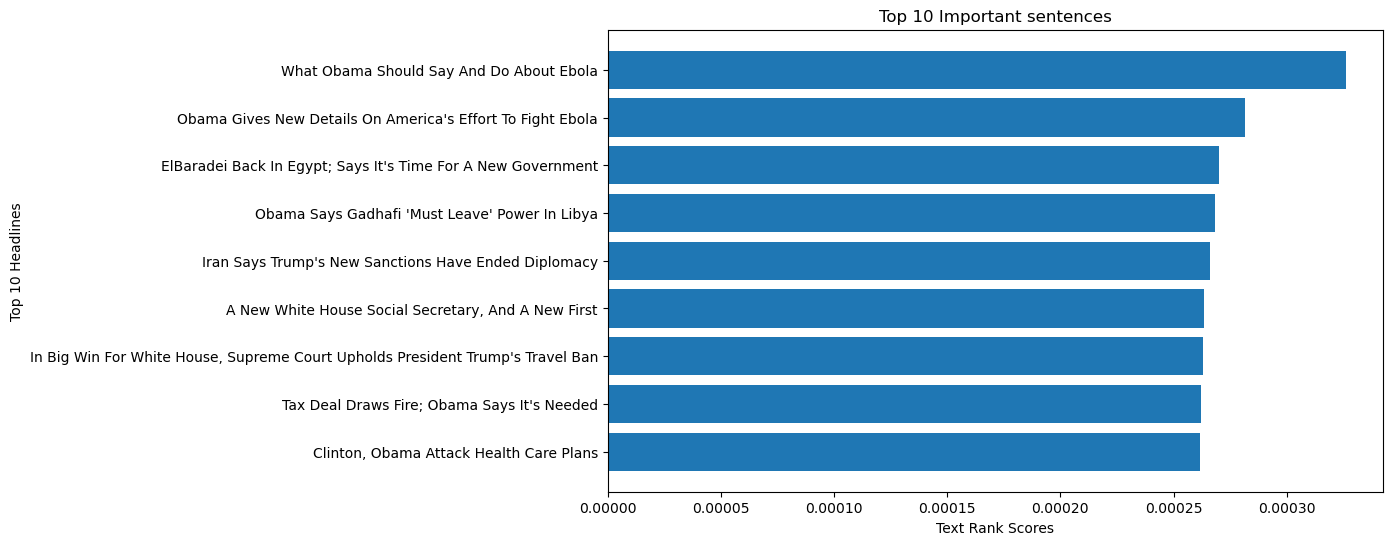

In [55]:
top_headlines = [headline[1] for headline in summary]

plt.figure(figsize=(10, 6))
plt.barh(top_headlines, [headline[0] for headline in summary])
plt.xlabel('Text Rank Scores')
plt.ylabel('Top 10 Headlines')
plt.title('Top 10 Important sentences')
plt.gca().invert_yaxis()
plt.show()


# Part Two (spaCy and scikit-learn):

# Import Required Libraries

# 1. Utilize spaCy

In [16]:
import spacy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.metrics.pairwise import cosine_similarity
import networkx as nx
nlp = spacy.load("en_core_web_sm")

# 2. Using the same "headlines.csv"

In [68]:
df2 = pd.read_csv("headlines.csv")
input_headlines = df2['headline'].tolist()
df2

,id,headline
0,524288,"For Some, The Decision To Enlist Offers Direction"
1,524289,Whither The Astronauts Without A Shuttle?
2,524292,Tour Winner May Not Be First Over Finish Line
3,262153,California College Students Walk Out Of Class ...
4,524298,New Theory On 'Shaken Baby Syndrome'
...,...,...
9993,553757,"In Mammogram Debate, Differences Aren't So Big"
9994,29471,"Insys Files For Chapter 11, Days After Landmar..."
9995,291616,U.S. Threatened To Fine Yahoo $250K A Day If I...
9996,29472,"Opioid-Maker Insys Admits To Bribing Doctors, ..."


# 3. Preprocess the headlines using spaCy

In [69]:
def text_preprocessing(text):
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]
    return " ".join(tokens)

df2['clntxt'] = df2['headline'].apply(text_preprocessing)

In [70]:
df2

,id,headline,clntxt
0,524288,"For Some, The Decision To Enlist Offers Direction",decision enlist Offers Direction
1,524289,Whither The Astronauts Without A Shuttle?,Astronauts Shuttle
2,524292,Tour Winner May Not Be First Over Finish Line,Tour Winner Finish line
3,262153,California College Students Walk Out Of Class ...,California College Students walk Class Protest...
4,524298,New Theory On 'Shaken Baby Syndrome',New Theory Shaken Baby Syndrome
...,...,...,...
9993,553757,"In Mammogram Debate, Differences Aren't So Big",Mammogram Debate difference big
9994,29471,"Insys Files For Chapter 11, Days After Landmar...",insys Files chapter 11 day Landmark Opioid Set...
9995,291616,U.S. Threatened To Fine Yahoo $250K A Day If I...,U.S. threaten Fine Yahoo $ 250 K day release U...
9996,29472,"Opioid-Maker Insys Admits To Bribing Doctors, ...",opioid Maker Insys admit Bribing doctor agree ...


# 4. Perform Part-of-Speech (POS)

In [71]:
df2['pos_tags'] = df2['clntxt'].apply(lambda x: [(token.text, token.pos_) for token in nlp(x)])

In [72]:
df2

,id,headline,clntxt,pos_tags
0,524288,"For Some, The Decision To Enlist Offers Direction",decision enlist Offers Direction,"[(decision, NOUN), (enlist, NOUN), (Offers, PR..."
1,524289,Whither The Astronauts Without A Shuttle?,Astronauts Shuttle,"[(Astronauts, PROPN), (Shuttle, PROPN)]"
2,524292,Tour Winner May Not Be First Over Finish Line,Tour Winner Finish line,"[(Tour, PROPN), (Winner, PROPN), (Finish, PROP..."
3,262153,California College Students Walk Out Of Class ...,California College Students walk Class Protest...,"[(California, PROPN), (College, PROPN), (Stude..."
4,524298,New Theory On 'Shaken Baby Syndrome',New Theory Shaken Baby Syndrome,"[(New, PROPN), (Theory, PROPN), (Shaken, PROPN..."
...,...,...,...,...
9993,553757,"In Mammogram Debate, Differences Aren't So Big",Mammogram Debate difference big,"[(Mammogram, PROPN), (Debate, PROPN), (differe..."
9994,29471,"Insys Files For Chapter 11, Days After Landmar...",insys Files chapter 11 day Landmark Opioid Set...,"[(insys, NOUN), (Files, PROPN), (chapter, NOUN..."
9995,291616,U.S. Threatened To Fine Yahoo $250K A Day If I...,U.S. threaten Fine Yahoo $ 250 K day release U...,"[(U.S., PROPN), (threaten, VERB), (Fine, PROPN..."
9996,29472,"Opioid-Maker Insys Admits To Bribing Doctors, ...",opioid Maker Insys admit Bribing doctor agree ...,"[(opioid, ADJ), (Maker, PROPN), (Insys, PROPN)..."


# 5. Perform Named Entity Recognition (NER) 

In [73]:
def custom_ner(txt):
    doc = nlp(txt)
    named_entities = [(ent.text, ent.label_, spacy.explain(ent.label_)) for ent in doc.ents]
    return named_entities


df2['ner_tag'] = df2['clntxt'].apply(custom_ner)

In [74]:
df2

,id,headline,clntxt,pos_tags,ner_tag
0,524288,"For Some, The Decision To Enlist Offers Direction",decision enlist Offers Direction,"[(decision, NOUN), (enlist, NOUN), (Offers, PR...",[]
1,524289,Whither The Astronauts Without A Shuttle?,Astronauts Shuttle,"[(Astronauts, PROPN), (Shuttle, PROPN)]","[(Astronauts Shuttle, PERSON, People, includin..."
2,524292,Tour Winner May Not Be First Over Finish Line,Tour Winner Finish line,"[(Tour, PROPN), (Winner, PROPN), (Finish, PROP...","[(Tour Winner, PERSON, People, including ficti..."
3,262153,California College Students Walk Out Of Class ...,California College Students walk Class Protest...,"[(California, PROPN), (College, PROPN), (Stude...","[(California College Students, ORG, Companies,..."
4,524298,New Theory On 'Shaken Baby Syndrome',New Theory Shaken Baby Syndrome,"[(New, PROPN), (Theory, PROPN), (Shaken, PROPN...",[]
...,...,...,...,...,...
9993,553757,"In Mammogram Debate, Differences Aren't So Big",Mammogram Debate difference big,"[(Mammogram, PROPN), (Debate, PROPN), (differe...",[]
9994,29471,"Insys Files For Chapter 11, Days After Landmar...",insys Files chapter 11 day Landmark Opioid Set...,"[(insys, NOUN), (Files, PROPN), (chapter, NOUN...","[(Files chapter, PERSON, People, including fic..."
9995,291616,U.S. Threatened To Fine Yahoo $250K A Day If I...,U.S. threaten Fine Yahoo $ 250 K day release U...,"[(U.S., PROPN), (threaten, VERB), (Fine, PROPN...","[(U.S., GPE, Countries, cities, states), (Fine..."
9996,29472,"Opioid-Maker Insys Admits To Bribing Doctors, ...",opioid Maker Insys admit Bribing doctor agree ...,"[(opioid, ADJ), (Maker, PROPN), (Insys, PROPN)...","[(Maker Insys, LOC, Non-GPE locations, mountai..."


# Step 6: Utilize spaCy's pipeline object

# Done in preprocessing in step3

# Step 7: TfidfVectorizer and LinearSVC pipeline

In [76]:
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC


custom_pipeline = make_pipeline(
    TfidfVectorizer(),
    LinearSVC()
)

# 8. Generate a summary of the news headlines using the TextRank algorithm

In [92]:
def textrank_spacy(preprocessed_texts):
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(preprocessed_texts)
    cosine_similarities = cosine_similarity(tfidf_matrix)
    nx_graph = nx.from_numpy_array(cosine_similarities)
    scores = nx.pagerank(nx_graph)
    return sorted(((scores[i], s) for i, s in enumerate(headlines)), reverse=True)[:10]

summary_spacy = textrank_spacy(preprocessed_headlines_spacy)


In [93]:
for i, sentence in enumerate(summary_spacy):
    print(f"Top {i+1}: {sentence}")

Top 1: (0.00034592707263350375, "Obama Says Gadhafi 'Must Leave' Power In Libya")
Top 2: (0.00031461792873543556, "In Big Win For White House, Supreme Court Upholds President Trump's Travel Ban")
Top 3: (0.0003101521902914795, 'Clinton, Obama Attack Health Care Plans')
Top 4: (0.00030728324662791123, "Obama Gives New Details On America's Effort To Fight Ebola")
Top 5: (0.00030728324662791123, "Obama Gives New Details On America's Effort To Fight Ebola")
Top 6: (0.0003059178333580201, 'What Obama Should Say And Do About Ebola')
Top 7: (0.00030447756343231376, 'Even If House Is Lost, Obama Finds Hope In History')
Top 8: (0.0003013801867156425, 'A New White House Social Secretary, And A New First')
Top 9: (0.00029611769866127606, "Iran Says Trump's New Sanctions Have Ended Diplomacy")
Top 10: (0.0002957678530328811, "U.S. To Transfer Lead In Libya In 'Days,' Obama Says")


# 9. Visualize the summary using matplotlib

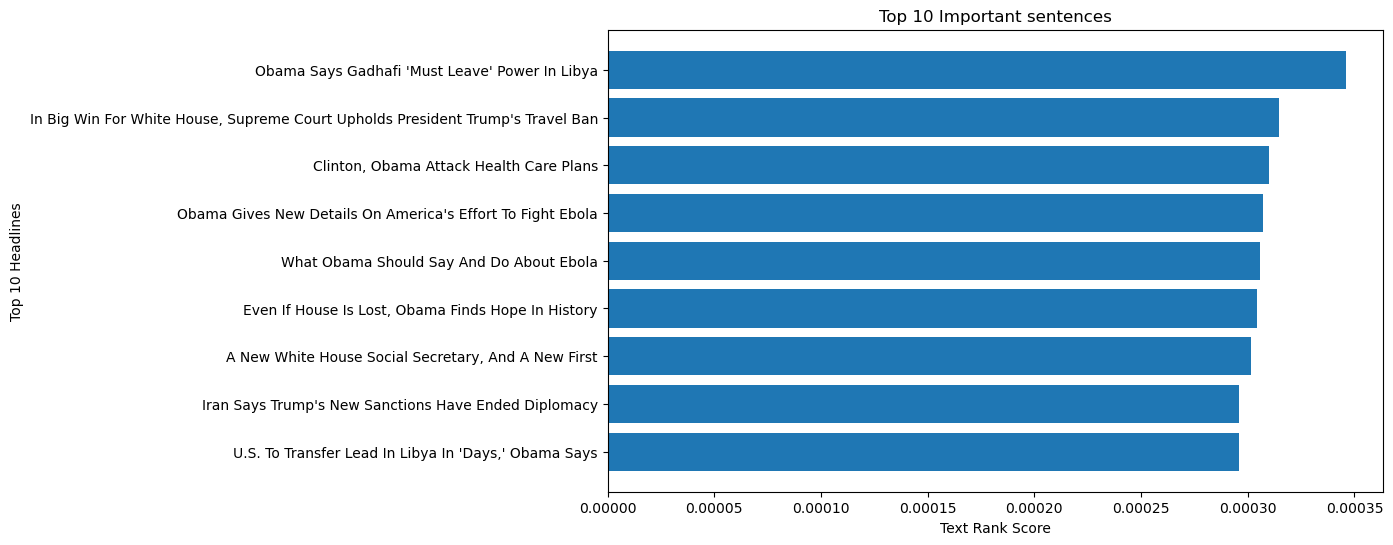

In [94]:
top_headlines = [headline[1] for headline in summary_spacy]

plt.figure(figsize=(10, 6))
plt.barh(top_headlines, [headline[0] for headline in summary_spacy])
plt.xlabel('Text Rank Score')
plt.ylabel('Top 10 Headlines')
plt.title('Top 10 Important sentences')
plt.gca().invert_yaxis()  # to display the highest score at the top
plt.show()

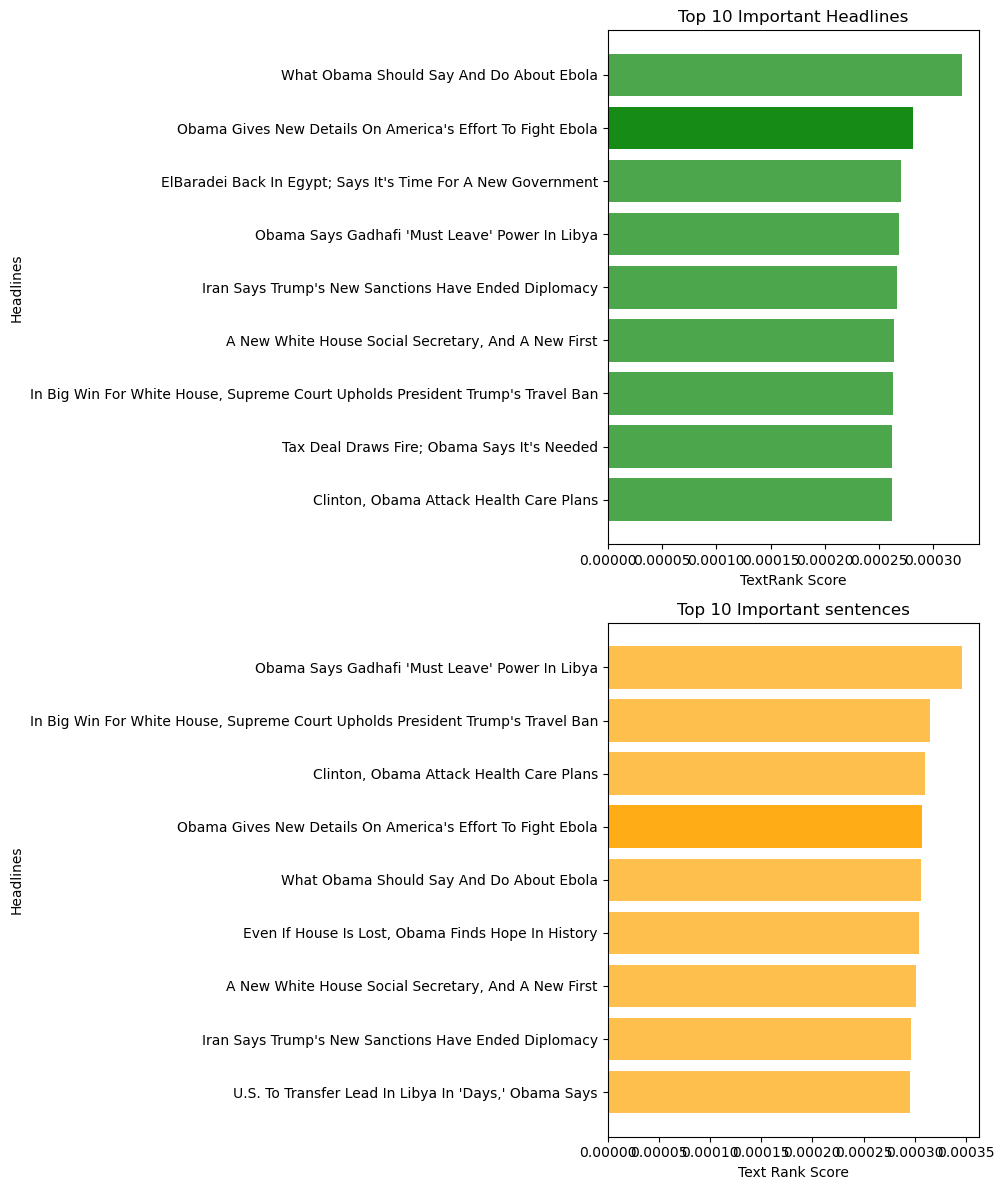

In [99]:
import matplotlib.pyplot as plt

def visualize_comparison(nltk_summary, spacy_summary):
    top_headlines_nltk = [headline[1] for headline in nltk_summary]
    scores_nltk = [headline[0] for headline in nltk_summary]

    top_headlines = [headline[1] for headline in spacy_summary]
    scores_spacy = [headline[0] for headline in spacy_summary]

    fig, axs = plt.subplots(2, 1, figsize=(10, 12))
    
    # Plot for NLTK
    axs[0].barh(top_headlines_nltk, scores_nltk, color='green', alpha=0.7, label='NLTK')
    axs[0].set_title('Top 10 Important Headlines')
    axs[0].set_xlabel('TextRank Score')
    axs[0].set_ylabel('Headlines')
    axs[0].invert_yaxis()

    # Plot for spaCy
    axs[1].barh(top_headlines, scores_spacy, color='orange', alpha=0.7, label='spaCy')
    axs[1].set_title('Top 10 Important sentences')
    axs[1].set_xlabel('Text Rank Score')
    axs[1].set_ylabel('Headlines')
    axs[1].invert_yaxis()

    plt.tight_layout()
    plt.show()

# Call the function with summaries obtained from NLTK and spaCy
visualize_comparison(summary, summary_spacy)

In [100]:
from IPython.core.display import display, HTML

def create_table_from_summary(summary, title):
    # Creating a HTML table from the given summary
    table_content = ""
    for score, headline in summary:
        table_content += f"<tr><td>{headline}</td><td>{score:.4f}</td></tr>"

    return f"""
    <table>
    <thead>
        <tr><th colspan="2">{title}</th></tr>
        <tr><th>Headline</th><th>TextRank Score</th></tr>
    </thead>
    <tbody>
        {table_content}
    </tbody>
    </table>
    """

nltk_table = create_table_from_summary(summary, "NLTK Summary")
spacy_table = create_table_from_summary(summary_spacy, "spaCy Summary")

# Displaying side by side using HTML tables
display(HTML(f"""
<div style="display: flex; justify-content: space-between;">
    <div style="width: 50%; margin-right: 10px;">{nltk_table}</div>
    <div style="width: 50%;">{spacy_table}</div>
</div>
"""))
